In [1]:
# from __future__ import print_function
# import tensorflow
# from tensorflow.keras.datasets import mnist
# from tensorflow.keras.layers import Dense, Flatten
# from tensorflow.keras.layers import Conv2D, MaxPooling2D
# from tensorflow.keras.models import Sequential
# import matplotlib.pylab as plt

# batch_size = 128
# num_classes = 10
# epochs = 10

# # input image dimensions
# img_x, img_y = 28, 28

# # load the MNIST data set, which already splits into train and test sets for us
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

# # reshape the data into a 4D tensor - (sample_number, x_img_size, y_img_size, num_channels)
# # because the MNIST is greyscale, we only have a single channel - RGB colour images would have 3
# x_train = x_train.reshape(x_train.shape[0], img_x, img_y, 1)
# x_test = x_test.reshape(x_test.shape[0], img_x, img_y, 1)
# input_shape = (img_x, img_y, 1)

# # convert the data to the right type
# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')
# x_train /= 255
# x_test /= 255
# print('x_train shape:', x_train.shape)
# print(x_train.shape[0], 'train samples')
# print(x_test.shape[0], 'test samples')

# # convert class vectors to binary class matrices - this is for use in the
# # categorical_crossentropy loss below
# y_train = tf.keras.utils.to_categorical(y_train, num_classes)
# y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# model = Sequential()
# model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
#                  activation='relu',
#                  input_shape=input_shape))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# model.add(Conv2D(64, (5, 5), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(1000, activation='relu'))
# model.add(Dense(num_classes, activation='softmax'))

# model.compile(loss=tf.keras.losses.categorical_crossentropy,
#               optimizer=tf.keras.optimizers.Adam(),
#               metrics=['accuracy'])


# class AccuracyHistory(tf.keras.callbacks.Callback):
#     def on_train_begin(self, logs={}):
#         self.acc = []

#     def on_epoch_end(self, batch, logs={}):
#         self.acc.append(logs.get('acc'))

# history = AccuracyHistory()

# model.fit(x_train, y_train,
#           batch_size=batch_size,
#           epochs=epochs,
#           verbose=1,
#           validation_data=(x_test, y_test),
#           callbacks=[history])
# score = model.evaluate(x_test, y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])
# plt.plot(range(1, 11), history.acc)
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.show()

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2 as cv

In [3]:
DATADIR = '/home/hp/Desktop/tensor-task8/'
CATEGORIES = ['Human','Non-Human']

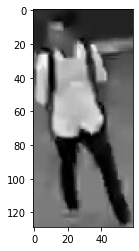

In [4]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv.imread(os.path.join(path,img),0)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break

In [5]:
img_array.shape

(129, 59)

In [6]:
IMG_SIZE = 64
new_array = cv.resize(img_array,(IMG_SIZE,IMG_SIZE))

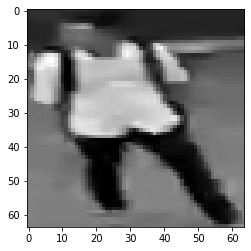

In [7]:
plt.imshow(new_array,cmap='gray')
plt.show()

In [8]:
training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv.imread(os.path.join(path,img),0)
                new_array = cv.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [9]:
print(len(training_data))

21758


In [10]:
import random
random.shuffle(training_data)

In [11]:
for sample in training_data[:10]:
    print(sample[1])

1
1
1
1
0
0
1
1
1
1


In [12]:
X = []
y = []

In [13]:
for features, label in training_data:
    X.append(features)
    y.append(label)

In [14]:
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y = np.array(y)

In [15]:
print(X[0].shape)

(64, 64, 1)


In [16]:
X = X/255.0

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Dropout, Activation

In [18]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape = X.shape[1:],activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),input_shape=X.shape[1:],activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X,y,batch_size=32,validation_split=0.2)

544/544 [==============================] - 109s 200ms/step - loss: 0.2276 - accuracy: 0.9050 - val_loss: 0.1051 - val_accuracy: 0.9639


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                802880    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

In [30]:
import cv2 as cv
import numpy as np
cap = cv.VideoCapture('/home/hp/Desktop/tensor-task8/people.mp4')
fbgb = cv.createBackgroundSubtractorMOG2()

while cap.isOpened:
    _, frame = cap.read()
    fgmask = fbgb.apply(frame)
    blur = cv.GaussianBlur(fgmask,(5,5),0)
    median = cv.medianBlur(blur,5)
    
    _, thresh = cv.threshold(median,30,255,cv.THRESH_BINARY)
    
    contours, _ = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
    for c in contours:
        if cv.contourArea(c) < 400:
            continue
        (x, y, w, h) = cv.boundingRect(c)
        croped = thresh[y:y+h, x:x+w]
        resized = cv.resize(croped,dsize=(64,64))
        img_input = np.array(resized).reshape(-1,64,64,1)
        k = model.predict(img_input)
        cv.rectangle(frame, (x,y), (x+w-30, y+h-30), (0,255,0), 2)
        if k == 1:
            cv.putText(frame, 'human', (x,y),cv.FONT_HERSHEY_COMPLEX,0.5,(0,0,255),1)
        
    cv.imshow('rgb',frame)
    if cv.waitKey(25) & 0xff == ord('q'):
        break
cap.release()
cv.destroyAllWindows()
        
